<a href="https://colab.research.google.com/github/jinrumiao/Prediction-of-quality-of-Wine/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_02%EF%BC%9A%E7%B4%85%E9%85%92%E5%93%81%E8%B3%AA%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')


In [2]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 特徵解釋
1、fixed acidity：不易蒸發的酸

2、volatile acidity：揮發性的酸(醋酸)，過多的醋酸會導致品嘗經驗不佳

3、citric acid：檸檬酸，少量的檸檬酸可以為紅酒添加新鮮感及風味

4、residual sugar：發酵步驟停止後殘留的糖分，

5、chlorides：紅酒中的鹽分

6、free sulfur dioxide：游離二氧化硫，可以抑制微生物成長與氧化

7、total sulfur dioxide：游離二氧化硫以及二氧化硫總量，當游離二氧化硫大於50ppm時，嗅覺上會有明顯感受

8、density：密度，與水的密度差異，受紅酒中的酒精以及糖分影響

9、pH：酸鹼度，多數紅酒界於3到4之間

10、sulphates：硫酸鹽，微生物抑制劑、抗氧化劑

11、alcohol：酒精濃度

## 資料分佈與分析

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.style.use("ggplot")
sns.set_style("white")
matplotlib.rcParams["figure.figsize"] = 8, 6

In [5]:
def plot_distribution(df, var, target=None, **kwargs):
    row = kwargs.get("row", None)
    col = kwargs.get("col", None)
    facet = sns.FacetGrid(df, hue=target, aspect=4, row=row, col=col)
    facet.map(sns.kdeplot, var, fill=True)
    # facet.set(xlim=(0, df[var].max()))
    facet.add_legend()


def plot_catecories(df, cat, target, **kwargs):
    row = kwargs.get("row", None)
    col = kwargs.get("col", None)
    facet = sns.FacetGrid(df, row=row, col=col)
    facet.map(sns.barplot, cat, target)
    facet.add_legend()

In [6]:
colunms = df.columns
print(colunms[:-1])

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


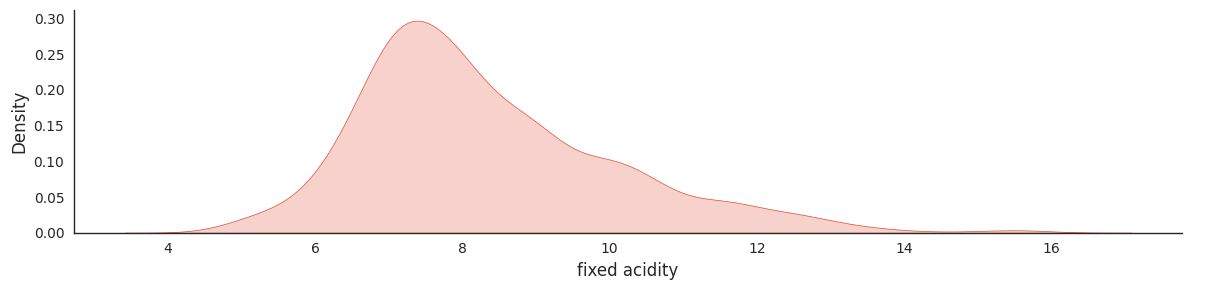

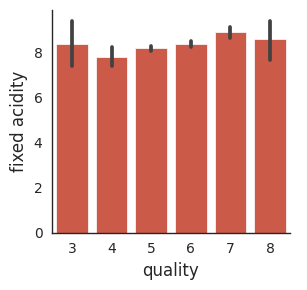

In [7]:
# 1、fixed acidity：不易蒸發的酸
plot_distribution(df, var="fixed acidity")
plot_catecories(df, cat="quality", target="fixed acidity")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


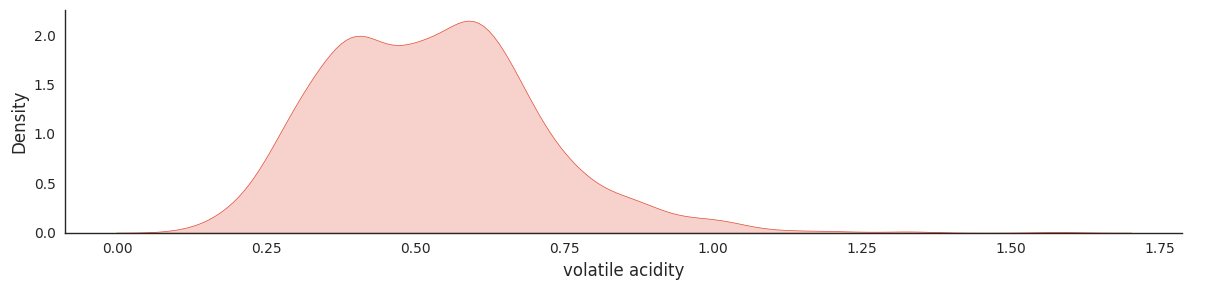

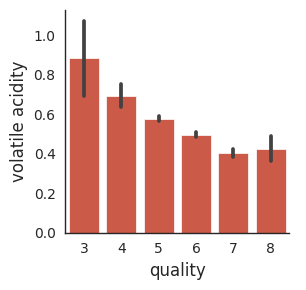

In [8]:
# 2、volatile acidity：揮發性的酸(醋酸)，過多的醋酸會導致品嘗經驗不佳
plot_distribution(df, var="volatile acidity")
plot_catecories(df, cat="quality", target="volatile acidity")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


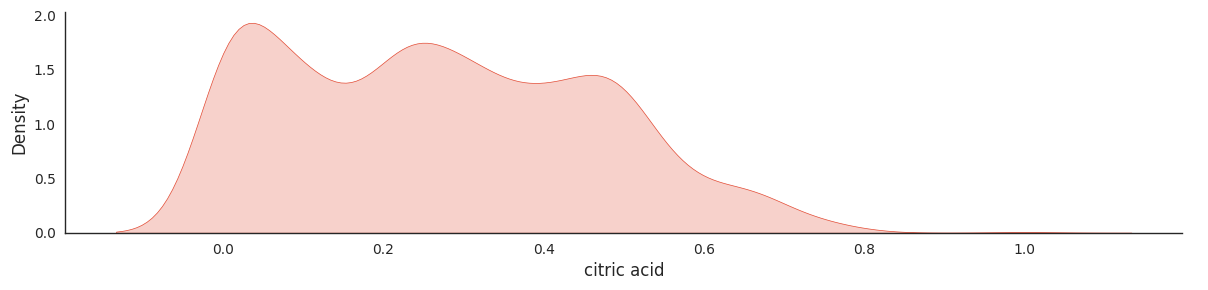

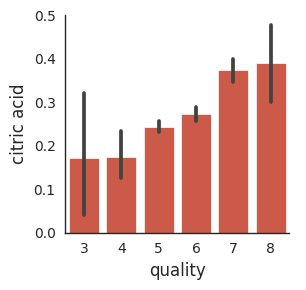

In [9]:
# 3、citric acid：檸檬酸，少量的檸檬酸可以為紅酒添加新鮮感及風味
plot_distribution(df, var="citric acid")
plot_catecories(df, cat="quality", target="citric acid")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


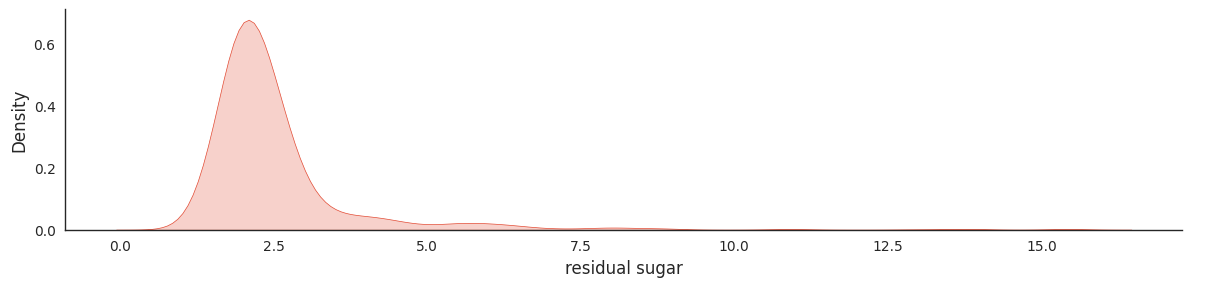

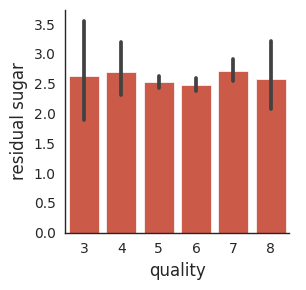

In [10]:
# 4、residual sugar：發酵步驟停止後殘留的糖分，很少有紅酒的糖度小於1 g/liter
plot_distribution(df, var="residual sugar")
plot_catecories(df, cat="quality", target="residual sugar")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


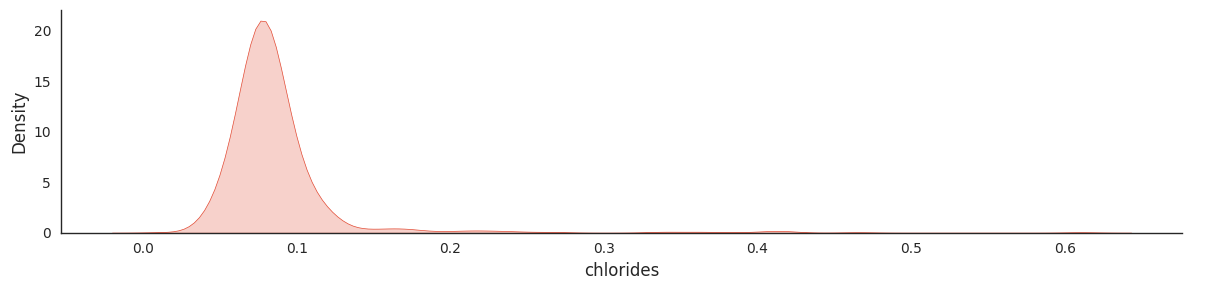

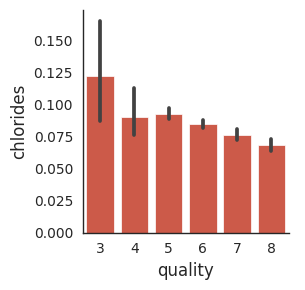

In [11]:
# 5、chlorides：紅酒中的鹽分
plot_distribution(df, var="chlorides")
plot_catecories(df, cat="quality", target="chlorides")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


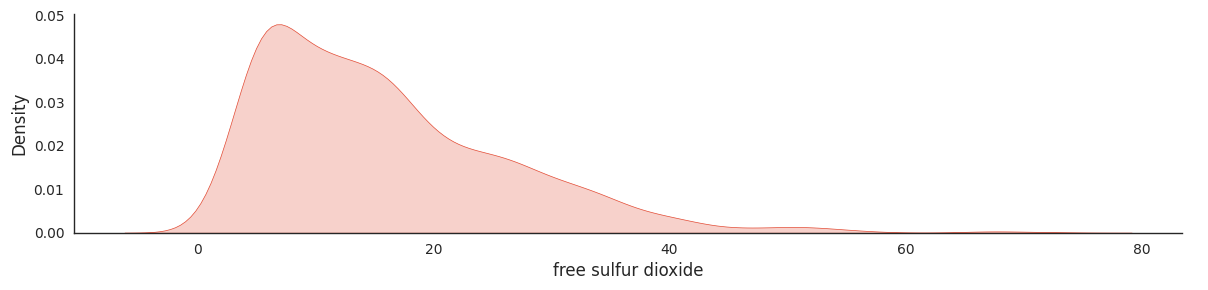

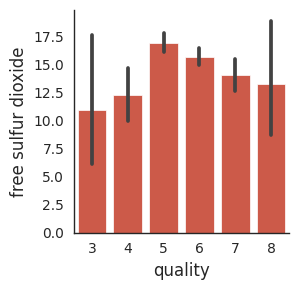

In [12]:
# 6、free sulfur dioxide：游離二氧化硫，可以抑制微生物成長與氧化
plot_distribution(df, var="free sulfur dioxide")
plot_catecories(df, cat="quality", target="free sulfur dioxide")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


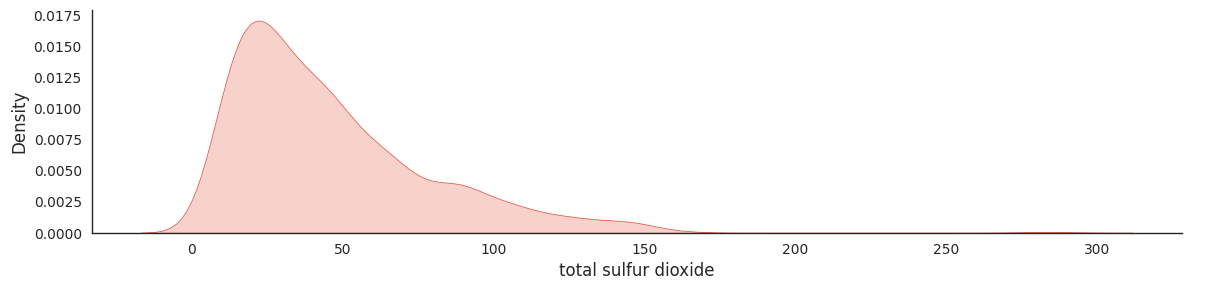

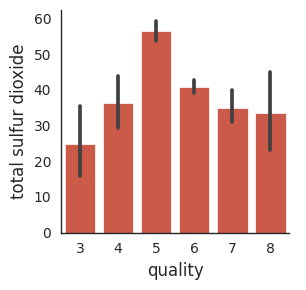

In [13]:
# 7、total sulfur dioxide：游離二氧化硫以及二氧化硫總量，當游離二氧化硫大於50ppm時，嗅覺上會有明顯感受
plot_distribution(df, var="total sulfur dioxide")
plot_catecories(df, cat="quality", target="total sulfur dioxide")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


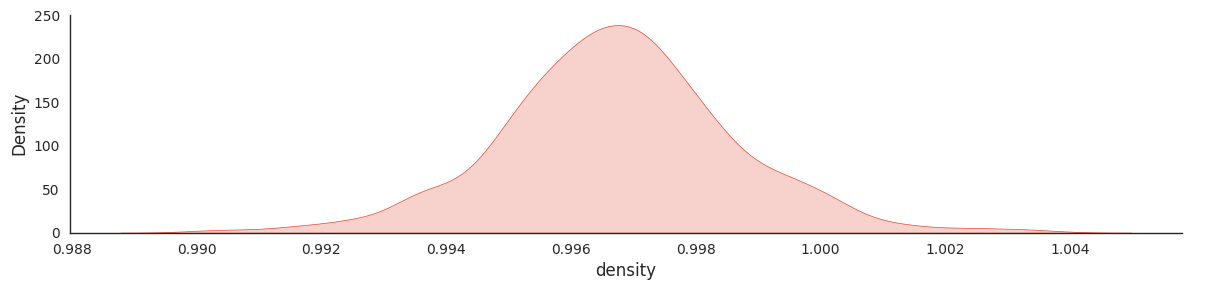

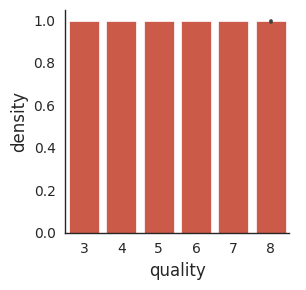

In [14]:
# 8、density：密度，與水的密度差異，受紅酒中的酒精以及糖分影響
plot_distribution(df, var="density")
plot_catecories(df, cat="quality", target="density")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


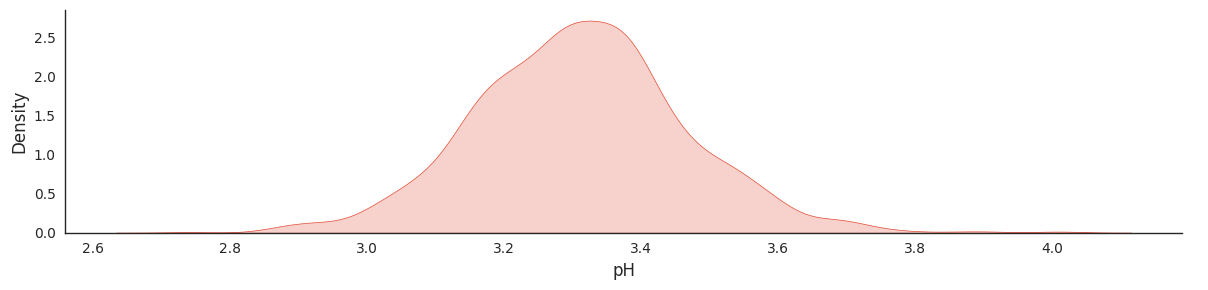

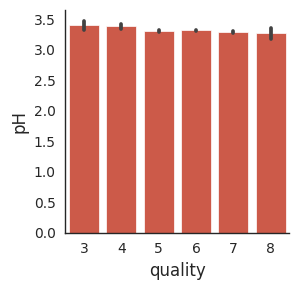

In [15]:
# 9、pH：酸鹼度，多數紅酒界於3到4之間
plot_distribution(df, var="pH")
plot_catecories(df, cat="quality", target="pH")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


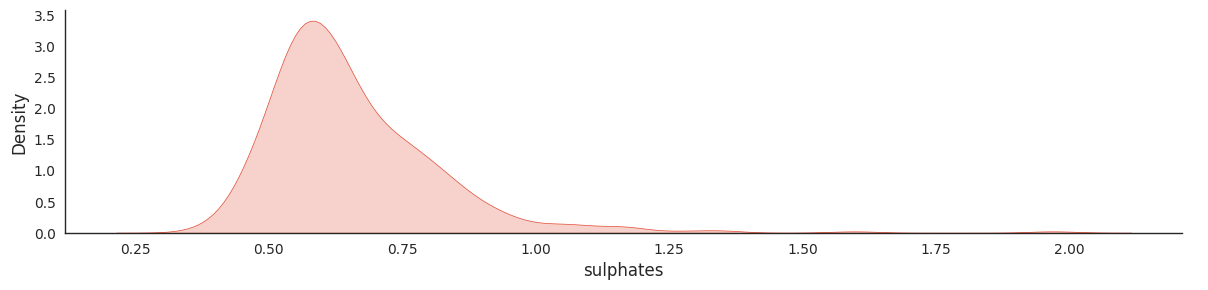

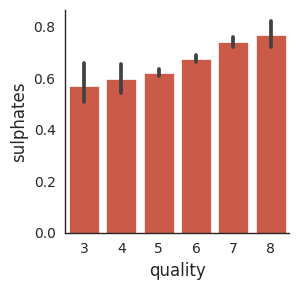

In [16]:
# 10、sulphates：硫酸鹽，微生物抑制劑、抗氧化劑
plot_distribution(df, var="sulphates")
plot_catecories(df, cat="quality", target="sulphates")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


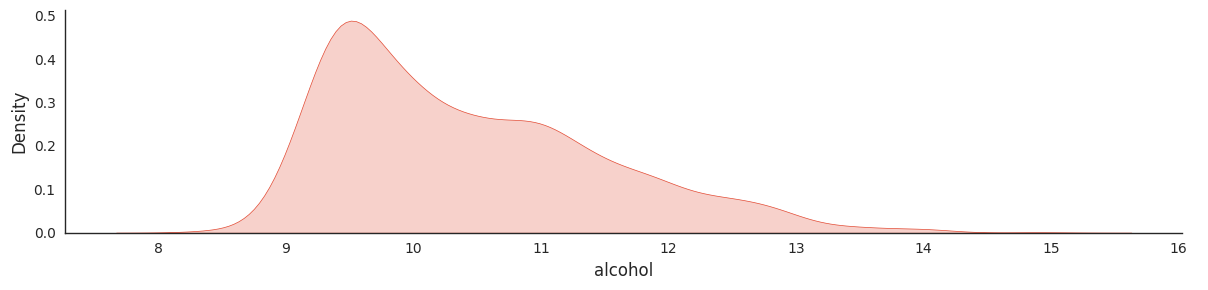

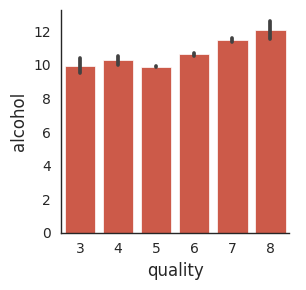

In [17]:
# 11、alcohol：酒精濃度
plot_distribution(df, var="alcohol")
plot_catecories(df, cat="quality", target="alcohol")

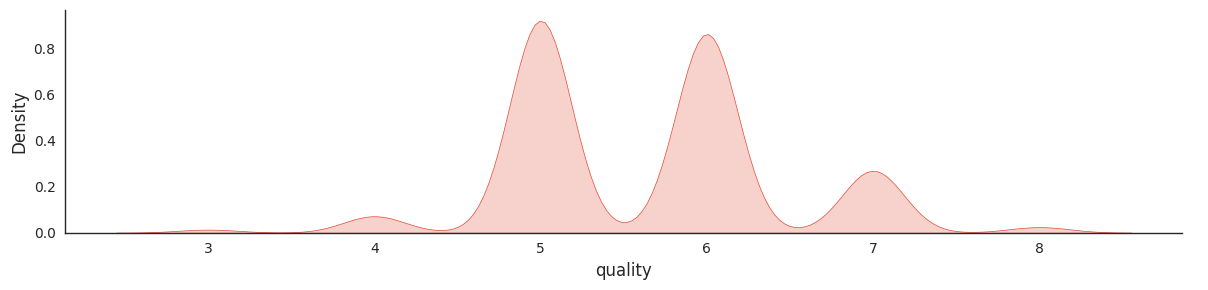

In [18]:
# 標籤資料分布
plot_distribution(df, var="quality")

<Axes: >

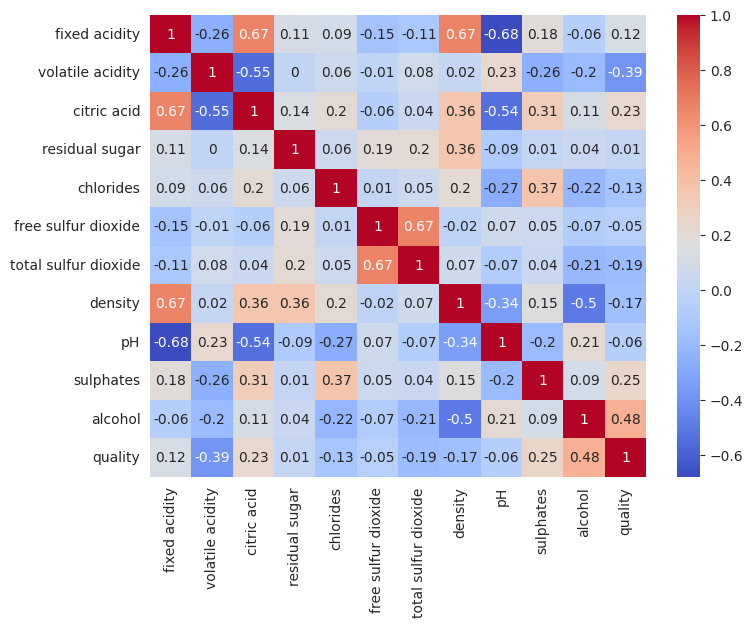

In [19]:
matrix = df.corr()
# print(matrix)

matrix = matrix.apply(lambda x: round(x, 2))

sns.heatmap(matrix, annot=True, cmap='coolwarm')

可以發現與quality相關性較高的特徵有：volatile acidity、citric acid、sulphates、alcohol，這邊是將關係係數的絕對值大於0.2視為有較高相關性

## 資料前處理

### 1、確認資料完整性與資料類型

In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


●資料無缺失值，除了quality為int外，其他特徵為float

### 2、Feature Scaling: Standardization

2.1 從熱力圖中，將關係係數絕對值小於0.1的特徵去除 (residual sugar、free sulfur dioxide、pH)

In [21]:
df_ = df.drop(["residual sugar", "free sulfur dioxide", "pH"], axis=1)
# df_.head(10)
df_.describe()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,0.087467,46.467792,0.996747,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,0.047065,32.895324,0.001887,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.012000,6.000000,0.990070,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,0.070000,22.000000,0.995600,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,0.079000,38.000000,0.996750,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,0.090000,62.000000,0.997835,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,0.611000,289.000000,1.003690,2.000000,14.900000,8.000000


2.2 針對不同特徵做不同的標準化

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

standar_columns = ["fixed acidity", "total sulfur dioxide", "alcohol"]  # 選擇標準差大於1的特徵

standar_sc = StandardScaler()

df_standar_scaled = standar_sc.fit_transform(df_[standar_columns])

df_standar = pd.DataFrame(df_standar_scaled, columns=standar_columns)
df_standar.head(10)


,fixed acidity,total sulfur dioxide,alcohol
0,-0.528360,-0.379133,-0.960246
1,-0.298547,0.624363,-0.584777
2,-0.298547,0.229047,-0.584777
3,1.654856,0.411500,-0.584777
4,-0.528360,-0.379133,-0.960246
5,-0.528360,-0.196679,-0.960246
6,-0.241094,0.381091,-0.960246
7,-0.585813,-0.774449,-0.397043
8,-0.298547,-0.865676,-0.866379
9,-0.470907,1.688677,0.072294


In [23]:
minmax_columns = ["volatile acidity", "citric acid", "chlorides", "density", "sulphates"]  # 選擇標準差小於1的特徵

minmax_sc = MinMaxScaler(feature_range=(0, 1))

df_minmax_scaled = minmax_sc.fit_transform(df_[minmax_columns])

df_minmax = pd.DataFrame(df_minmax_scaled, columns=minmax_columns)
df_minmax.head(10)

,volatile acidity,citric acid,chlorides,density,sulphates
0,0.397260,0.00,0.106845,0.567548,0.137725
1,0.520548,0.00,0.143573,0.494126,0.209581
2,0.438356,0.04,0.133556,0.508811,0.191617
3,0.109589,0.56,0.105175,0.582232,0.149701
4,0.397260,0.00,0.106845,0.567548,0.137725
5,0.369863,0.00,0.105175,0.567548,0.137725
6,0.328767,0.06,0.095159,0.464758,0.077844
7,0.363014,0.00,0.088481,0.332599,0.083832
8,0.315068,0.02,0.101836,0.494126,0.143713
9,0.260274,0.36,0.098497,0.567548,0.281437


### 3、df連結

In [24]:
df_["quality"] = df_["quality"].apply(lambda x: x-3)

df_train = pd.concat([df_standar, df_minmax, df_["quality"]], axis=1)
df_train.head(10)

,fixed acidity,total sulfur dioxide,alcohol,volatile acidity,citric acid,chlorides,density,sulphates,quality
0,-0.528360,-0.379133,-0.960246,0.397260,0.00,0.106845,0.567548,0.137725,2
1,-0.298547,0.624363,-0.584777,0.520548,0.00,0.143573,0.494126,0.209581,2
2,-0.298547,0.229047,-0.584777,0.438356,0.04,0.133556,0.508811,0.191617,2
3,1.654856,0.411500,-0.584777,0.109589,0.56,0.105175,0.582232,0.149701,3
4,-0.528360,-0.379133,-0.960246,0.397260,0.00,0.106845,0.567548,0.137725,2
5,-0.528360,-0.196679,-0.960246,0.369863,0.00,0.105175,0.567548,0.137725,2
6,-0.241094,0.381091,-0.960246,0.328767,0.06,0.095159,0.464758,0.077844,2
7,-0.585813,-0.774449,-0.397043,0.363014,0.00,0.088481,0.332599,0.083832,4
8,-0.298547,-0.865676,-0.866379,0.315068,0.02,0.101836,0.494126,0.143713,4
9,-0.470907,1.688677,0.072294,0.260274,0.36,0.098497,0.567548,0.281437,2


In [25]:
df_train.describe()

,fixed acidity,total sulfur dioxide,alcohol,volatile acidity,citric acid,chlorides,density,sulphates,quality
count,1.599000e+03,1.599000e+03,1.599000e+03,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,3.554936e-16,4.443669e-17,1.066481e-16,0.279329,0.270976,0.125988,0.490211,0.196496,2.636023
std,1.000313e+00,1.000313e+00,1.000313e+00,0.122644,0.194801,0.078573,0.138571,0.101501,0.807569
min,-2.137045e+00,-1.230584e+00,-1.898919e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.007187e-01,-7.440403e-01,-8.663789e-01,0.184932,0.090000,0.096828,0.406021,0.131737,2.000000
50%,-2.410944e-01,-2.574968e-01,-2.093081e-01,0.273973,0.260000,0.111853,0.490455,0.173653,3.000000
75%,5.057952e-01,4.723184e-01,6.354971e-01,0.356164,0.420000,0.130217,0.570117,0.239521,3.000000
max,4.355149e+00,7.375154e+00,4.202453e+00,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


### 4、確認標籤類別數量是否平衡

In [26]:
df_train["quality"].value_counts()

2    681
3    638
4    199
1     53
5     18
0     10
Name: quality, dtype: int64

In [27]:
from imblearn.over_sampling import RandomOverSampler

X = df_train.iloc[:,:-1].values
y = df_train["quality"].values

ros = RandomOverSampler()

X, y = ros.fit_resample(X, y)

pd.DataFrame(y).value_counts()

0    681
1    681
2    681
3    681
4    681
5    681
dtype: int64

### 5、進行模型訓練

In [28]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5.1 隨機森林分類

In [29]:
from sklearn.ensemble import RandomForestClassifier

rfc_dict = {
    "n_estimators": [50, 100, 150, 200, 250, 300],
    "max_depth": [5, 10, 15, 20, 25]
}

rfc = RandomForestClassifier()

rfc_grid = GridSearchCV(estimator=rfc, param_grid=rfc_dict)
rfc_result = rfc_grid.fit(X_train, y_train)

# 評估，打分數
print(f"最佳準確率: {rfc_result.best_score_:.5f}，最佳參數組合：{rfc_result.best_params_}")
# 取得 cross validation 的平均準確率及標準差
means = rfc_result.cv_results_['mean_test_score']
stds = rfc_result.cv_results_['std_test_score']
params = rfc_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"平均準確率: {mean:.5f}, 標準差: {stdev:.5f}, 參數組合: {param}")

最佳準確率: 0.90728，最佳參數組合：{'max_depth': 15, 'n_estimators': 300}
平均準確率: 0.74449, 標準差: 0.01235, 參數組合: {'max_depth': 5, 'n_estimators': 50}
平均準確率: 0.74082, 標準差: 0.00963, 參數組合: {'max_depth': 5, 'n_estimators': 100}
平均準確率: 0.74632, 標準差: 0.01252, 參數組合: {'max_depth': 5, 'n_estimators': 150}
平均準確率: 0.74938, 標準差: 0.01443, 參數組合: {'max_depth': 5, 'n_estimators': 200}
平均準確率: 0.74755, 標準差: 0.01356, 參數組合: {'max_depth': 5, 'n_estimators': 250}
平均準確率: 0.74174, 標準差: 0.01415, 參數組合: {'max_depth': 5, 'n_estimators': 300}
平均準確率: 0.88648, 標準差: 0.00839, 參數組合: {'max_depth': 10, 'n_estimators': 50}
平均準確率: 0.88433, 標準差: 0.00623, 參數組合: {'max_depth': 10, 'n_estimators': 100}
平均準確率: 0.88556, 標準差: 0.00648, 參數組合: {'max_depth': 10, 'n_estimators': 150}
平均準確率: 0.88525, 標準差: 0.00607, 參數組合: {'max_depth': 10, 'n_estimators': 200}
平均準確率: 0.88433, 標準差: 0.00789, 參數組合: {'max_depth': 10, 'n_estimators': 250}
平均準確率: 0.88739, 標準差: 0.00469, 參數組合: {'max_depth': 10, 'n_estimators': 300}
平均準確率: 0.90606, 標準差: 0.00362, 參數組合: {'max_depth

5.2 決策樹分類

In [30]:
from sklearn.tree import DecisionTreeClassifier

dtc_dict = {
    "max_depth": [5, 10, 15, 20, 25]
}

dtc = DecisionTreeClassifier()

dtc_grid = GridSearchCV(estimator=dtc, param_grid=dtc_dict)
dtc_result = dtc_grid.fit(X_train, y_train)

# 評估，打分數
print(f"最佳準確率: {dtc_result.best_score_:.5f}，最佳參數組合：{dtc_result.best_params_}")
# 取得 cross validation 的平均準確率及標準差
means = dtc_result.cv_results_['mean_test_score']
stds = dtc_result.cv_results_['std_test_score']
params = dtc_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"平均準確率: {mean:.5f}, 標準差: {stdev:.5f}, 參數組合: {param}")

最佳準確率: 0.88158，最佳參數組合：{'max_depth': 15}
平均準確率: 0.63587, 標準差: 0.01919, 參數組合: {'max_depth': 5}
平均準確率: 0.83935, 標準差: 0.00607, 參數組合: {'max_depth': 10}
平均準確率: 0.88158, 標準差: 0.00265, 參數組合: {'max_depth': 15}
平均準確率: 0.87974, 標準差: 0.00498, 參數組合: {'max_depth': 20}
平均準確率: 0.88127, 標準差: 0.00596, 參數組合: {'max_depth': 25}


5.3 支持向量機分類

In [31]:
from sklearn.svm import SVC

svc_dict = {
    "C": [5, 10, 15, 20, 25],
    "degree": [3, 4, 5, 6, 7, 8]
}

svc = SVC()

svc_grid = GridSearchCV(estimator=svc, param_grid=svc_dict)
svc_result = svc_grid.fit(X_train, y_train)

# 評估，打分數
print(f"最佳準確率: {svc_result.best_score_:.5f}，最佳參數組合：{svc_result.best_params_}")
# 取得 cross validation 的平均準確率及標準差
means = svc_result.cv_results_['mean_test_score']
stds = svc_result.cv_results_['std_test_score']
params = svc_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"平均準確率: {mean:.5f}, 標準差: {stdev:.5f}, 參數組合: {param}")

最佳準確率: 0.74327，最佳參數組合：{'C': 25, 'degree': 3}
平均準確率: 0.69277, 標準差: 0.00963, 參數組合: {'C': 5, 'degree': 3}
平均準確率: 0.69277, 標準差: 0.00963, 參數組合: {'C': 5, 'degree': 4}
平均準確率: 0.69277, 標準差: 0.00963, 參數組合: {'C': 5, 'degree': 5}
平均準確率: 0.69277, 標準差: 0.00963, 參數組合: {'C': 5, 'degree': 6}
平均準確率: 0.69277, 標準差: 0.00963, 參數組合: {'C': 5, 'degree': 7}
平均準確率: 0.69277, 標準差: 0.00963, 參數組合: {'C': 5, 'degree': 8}
平均準確率: 0.71726, 標準差: 0.01458, 參數組合: {'C': 10, 'degree': 3}
平均準確率: 0.71726, 標準差: 0.01458, 參數組合: {'C': 10, 'degree': 4}
平均準確率: 0.71726, 標準差: 0.01458, 參數組合: {'C': 10, 'degree': 5}
平均準確率: 0.71726, 標準差: 0.01458, 參數組合: {'C': 10, 'degree': 6}
平均準確率: 0.71726, 標準差: 0.01458, 參數組合: {'C': 10, 'degree': 7}
平均準確率: 0.71726, 標準差: 0.01458, 參數組合: {'C': 10, 'degree': 8}
平均準確率: 0.73409, 標準差: 0.00724, 參數組合: {'C': 15, 'degree': 3}
平均準確率: 0.73409, 標準差: 0.00724, 參數組合: {'C': 15, 'degree': 4}
平均準確率: 0.73409, 標準差: 0.00724, 參數組合: {'C': 15, 'degree': 5}
平均準確率: 0.73409, 標準差: 0.00724, 參數組合: {'C': 15, 'degree': 6}
平均準確率: 0.73409, 標

5.4 使用xgboost

In [32]:
from xgboost import XGBClassifier


xgb_dict = {
    "n_estimators": [50, 100, 150, 200, 250, 300],
    "max_depth": [5, 10, 15, 20, 25],
    "learning_rate": [0.1, 0.05, 0.001]
}

xgb = XGBClassifier()

xgb_grid = GridSearchCV(estimator=xgb, param_grid=xgb_dict)
xgb_result = xgb_grid.fit(X_train, y_train)

# 評估，打分數
print(f"最佳準確率: {xgb_result.best_score_:.5f}，最佳參數組合：{xgb_result.best_params_}")
# 取得 cross validation 的平均準確率及標準差
means = xgb_result.cv_results_['mean_test_score']
stds = xgb_result.cv_results_['std_test_score']
params = xgb_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"平均準確率: {mean:.5f}, 標準差: {stdev:.5f}, 參數組合: {param}")

最佳準確率: 0.89995，最佳參數組合：{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}
平均準確率: 0.84761, 標準差: 0.00913, 參數組合: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
平均準確率: 0.88188, 標準差: 0.01072, 參數組合: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
平均準確率: 0.89076, 標準差: 0.01020, 參數組合: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
平均準確率: 0.89382, 標準差: 0.00930, 參數組合: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
平均準確率: 0.89290, 標準差: 0.00908, 參數組合: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 250}
平均準確率: 0.89627, 標準差: 0.00861, 參數組合: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
平均準確率: 0.89413, 標準差: 0.01000, 參數組合: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50}
平均準確率: 0.89994, 標準差: 0.00995, 參數組合: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
平均準確率: 0.89841, 標準差: 0.00709, 參數組合: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 150}
平均準確率: 0.89749, 標準差: 0.00712, 參數組合: {'learning_rate'

5.5 使用神經網路建立模型

In [33]:
import torch
import torch.nn as nn


class nnModel(nn.Module):
    def __init__(self):
        super(nnModel, self).__init__()
        self.fc1 = nn.Linear(8, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 6)
        self.output = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.output(x)

        return x

In [34]:
model = nnModel()
print(model)

nnModel(
  (fc1): Linear(in_features=8, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=6, bias=True)
  (output): Softmax(dim=1)
)


In [35]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")
model.to(device)

Using cuda device


nnModel(
  (fc1): Linear(in_features=8, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=6, bias=True)
  (output): Softmax(dim=1)
)

In [36]:
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable

X_train_torch = torch.tensor(X_train, requires_grad=True).to(torch.float32)

X_test_torch = torch.tensor(X_test, requires_grad=True).to(torch.float32)

y_train_torch = torch.tensor(y_train).to(torch.int64)

y_test_torch = torch.tensor(y_test).to(torch.int64)

train_dataset = TensorDataset(X_train_torch, y_train_torch)
test_dataset = TensorDataset(X_test_torch, y_test_torch)

# print(train_dataset)
# print(test_dataset)

# 分配到不同的DataLoader中
train_loader = DataLoader(train_dataset, batch_size=50, shuffle=True, pin_memory=True)
# print(next(iter(train_loader)))
test_loader = DataLoader(test_dataset, batch_size=50, shuffle=True, pin_memory=True)
# print(next(iter(test_loader)))

In [37]:
import torch.optim as optim
import numpy as np

LR = 0.001  # learning rate
# 紀錄loss & accuracy
train_losses, valid_losses = [], []
train_acc, valid_acc = [], []
best_loss = np.Inf

epochs = 200
for epoch in range(epochs):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=LR)
    train_loss = 0.0
    valid_loss = 0.0
    train_corrects = 0
    valid_corrects = 0

    # training
    model.train()
    for i, data in enumerate(train_loader, 0):
        # get the inputs
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        # loss = mse(preds, labels)
        loss.backward()
        optimizer.step()

        train_corrects += torch.sum(preds == labels.data)

        # print statistics
        print(f"epoch: {epoch + 1:4d} → training batch: {i + 1:4d}, loss: {loss.item():.5f}")
        train_loss += loss.item() * inputs.size(0)  # total loss of 1 batch

    # validating
    model.eval()
    for i, data in enumerate(test_loader, 0):
        # get the inputs
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        # loss = mse(preds, labels)

        valid_corrects += torch.sum(preds == labels.data)

        print(f"epoch: {epoch + 1:4d} → testing batch: {i + 1:4d}, loss: {loss.item():.5f}")
        valid_loss += loss.item() * inputs.size(0)

    train_loss = train_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    train_accuracy = train_corrects / len(train_loader.dataset)
    train_acc.append(train_accuracy.cpu())

    valid_loss = valid_loss / len(test_loader.dataset)
    valid_losses.append(valid_loss)

    valid_accuracy = valid_corrects / len(test_loader.dataset)
    valid_acc.append(valid_accuracy.cpu())
    print(f"epoch: {epoch + 1:4d} Done!!!! → \n"
          f"training loss: {train_loss:.5f}, validating loss: {valid_loss:.5f},\n"
          f"training accuracy: {train_accuracy:.4f}, validation accuracy: {valid_accuracy:.4f}")

串流輸出內容已截斷至最後 5000 行。
epoch:  142 → testing batch:    9, loss: 1.38959
epoch:  142 → testing batch:   10, loss: 1.49346
epoch:  142 → testing batch:   11, loss: 1.50579
epoch:  142 → testing batch:   12, loss: 1.44565
epoch:  142 → testing batch:   13, loss: 1.52141
epoch:  142 → testing batch:   14, loss: 1.47738
epoch:  142 → testing batch:   15, loss: 1.52047
epoch:  142 → testing batch:   16, loss: 1.57816
epoch:  142 → testing batch:   17, loss: 1.43714
epoch:  142 Done!!!! → 
training loss: 1.46498, validating loss: 1.46881,
training accuracy: 0.5811, validation accuracy: 0.5770
epoch:  143 → training batch:    1, loss: 1.46693
epoch:  143 → training batch:    2, loss: 1.40181
epoch:  143 → training batch:    3, loss: 1.44695
epoch:  143 → training batch:    4, loss: 1.49755
epoch:  143 → training batch:    5, loss: 1.48934
epoch:  143 → training batch:    6, loss: 1.38512
epoch:  143 → training batch:    7, loss: 1.50060
epoch:  143 → training batch:    8, loss: 1.39168
epoch:  1

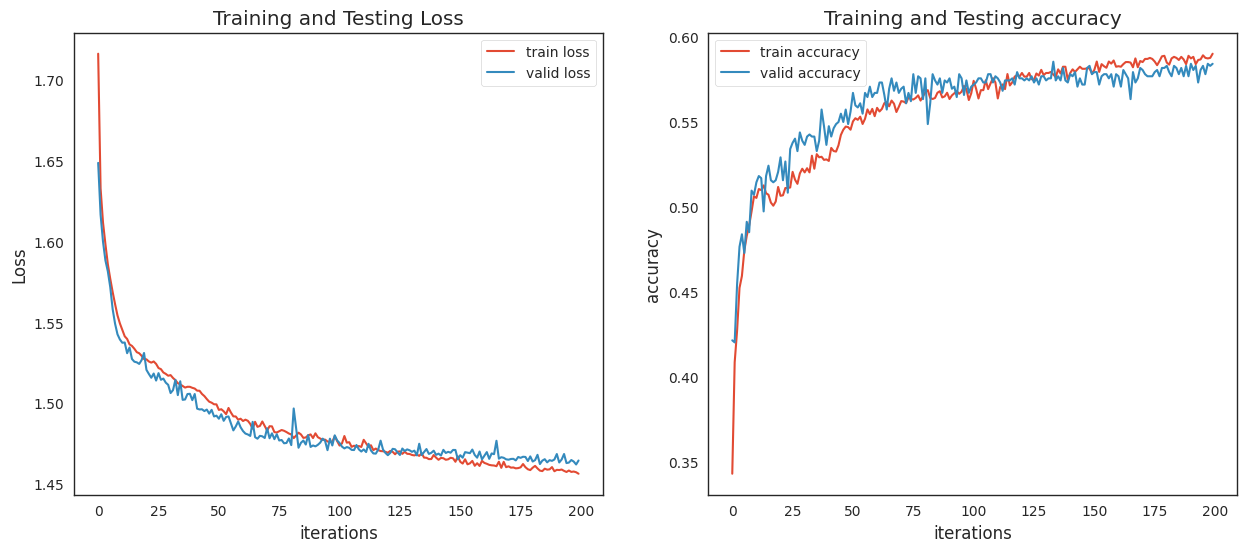

In [38]:
# 畫出loss & accuracy隨著epoch改變的關係
fig = plt.figure(figsize=(15, 6))
fig.add_subplot(1, 2, 1)
plt.title("Training and Testing Loss")
plt.plot(train_losses, label="train loss")
plt.plot(valid_losses, label="valid loss")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
fig.add_subplot(1, 2, 2)
plt.title("Training and Testing accuracy")
plt.plot(train_acc, label="train accuracy")
plt.plot(valid_acc, label="valid accuracy")
plt.xlabel("iterations")
plt.ylabel("accuracy")
plt.legend()
# plt.savefig("loss & accuracy.jpg")

plt.show()